In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [4]:
dtest = pd.read_excel('C:\ggg\Doctor_fee_consultation\Final Participant Data Folder\Final_Test.xlsx')
dtest

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...
...,...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10 years experience,NaN,"Basavanagudi, Bangalore",Ayurveda,NaN
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4 years experience,NaN,"Choolai, Chennai",Dermatologists,NaN
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9 years experience,NaN,"Porur, Chennai",General Medicine,NaN
1985,BDS,12 years experience,98%,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...


In [6]:
dtrain = pd.read_excel('C:\ggg\Doctor_fee_consultation\Final Participant Data Folder\Final_Train.xlsx')
dtrain

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100


In [7]:
dtest.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
dtype: object

In [8]:
dtrain.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
Fees                   int64
dtype: object

In [9]:
dtest.shape

(1987, 6)

In [10]:
dtrain.shape

(5961, 7)

In [11]:
dtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       1987 non-null   object
 1   Experience          1987 non-null   object
 2   Rating              897 non-null    object
 3   Place               1981 non-null   object
 4   Profile             1987 non-null   object
 5   Miscellaneous_Info  1153 non-null   object
dtypes: object(6)
memory usage: 93.3+ KB


In [12]:
dtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


In [13]:
dtrain['Qualification'].value_counts()

BDS                                                                                     488
BHMS                                                                                    477
BAMS                                                                                    471
MBBS                                                                                    334
MBBS, MS - ENT                                                                          220
                                                                                       ... 
BHMS, MSc - Physiology                                                                    1
BDS, F.A.G.E, Certificate in Dental Implants                                              1
MBBS, Diploma in Otorhinolaryngology (DLO), MS - ENT, FCPS - Mid. & Gynae, DNB - ENT      1
DNB - Dermatology & Venereology, Fellowship in Cosmetology, DVD, MBBS                     1
BDS, MDS, Fellowship In Cosmetic Dermatology                                    

In [14]:
dtest.isnull().sum()

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64

In [15]:
dtrain.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

In [16]:
dtrain.Rating.fillna(value=27,inplace=True)
dtrain.Place.fillna(value=27,inplace=True)
dtrain.Miscellaneous_Info.fillna(value=27,inplace=True)
dtest.Rating.fillna(value=27,inplace=True)
dtest.Place.fillna(value=27,inplace=True)
dtest.Miscellaneous_Info.fillna(value=27,inplace=True)

In [17]:
dtest.isnull().sum()

Qualification         0
Experience            0
Rating                0
Place                 0
Profile               0
Miscellaneous_Info    0
dtype: int64

In [18]:
dtrain.isnull().sum()

Qualification         0
Experience            0
Rating                0
Place                 0
Profile               0
Miscellaneous_Info    0
Fees                  0
dtype: int64

<AxesSubplot:>

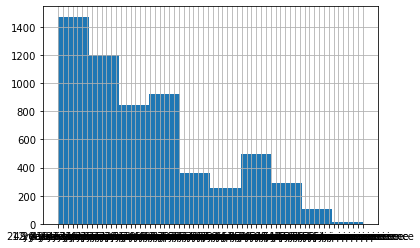

In [19]:
dtrain['Experience'].hist(bins=10)

<AxesSubplot:xlabel='Profile', ylabel='count'>

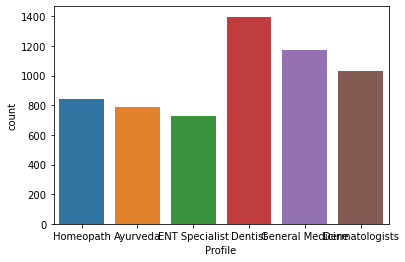

In [20]:
sns.countplot(dtrain.Profile)

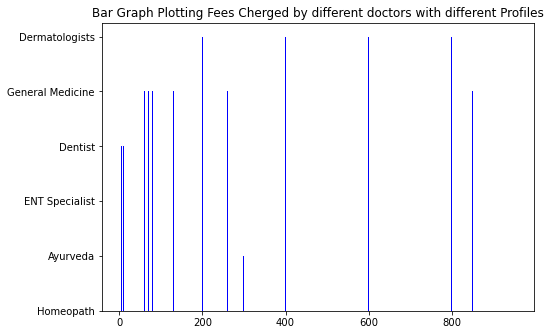

In [21]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(dtrain['Fees'],dtrain['Profile'], color = 'b')
plt.title('Bar Graph Plotting Fees Cherged by different doctors with different Profiles')
plt.show()

In [22]:
dtrain.skew()

Fees    0.75187
dtype: float64

In [23]:
dtrain = dtrain[['Qualification', 'Profile', 'Experience', 'Place', 'Miscellaneous_Info', 'Rating','Fees']]
dtest = dtest[['Qualification', 'Profile','Experience', 'Place', 'Miscellaneous_Info', 'Rating']]

In [24]:
dtrain.head()

,Qualification,Profile,Experience,Place,Miscellaneous_Info,Rating,Fees
0,"BHMS, MD - Homeopathy",Homeopath,24 years experience,"Kakkanad, Ernakulam","100% 16 Feedback Kakkanad, Ernakulam",100%,100
1,"BAMS, MD - Ayurveda Medicine",Ayurveda,12 years experience,"Whitefield, Bangalore","98% 76 Feedback Whitefield, Bangalore",98%,350
2,"MBBS, MS - Otorhinolaryngology",ENT Specialist,9 years experience,"Mathikere - BEL, Bangalore",27,27,300
3,"BSc - Zoology, BAMS",Ayurveda,12 years experience,"Bannerghatta Road, Bangalore","Bannerghatta Road, Bangalore ₹250 Available on...",27,250
4,BAMS,Ayurveda,20 years experience,"Keelkattalai, Chennai","100% 4 Feedback Keelkattalai, Chennai",100%,250


In [25]:
dtrain["Experience"] = dtrain["Experience"].str.split()
dtrain["Experience"] = dtrain["Experience"].str[0].astype("int")

dtest["Experience"] = dtest["Experience"].str.split()
dtest["Experience"] = dtest["Experience"].str[0].astype("int")

In [26]:
dtrain = pd.get_dummies(dtrain)
dtrain.head(5)

,Experience,Fees,Qualification_39 years experience,"Qualification_Advanced Certificate Course in Aesthetic Dentistry, BDS, Professional Implantology Training Course (PITC), FAGE- FELLOW, Comprehensive Course in Modern Endodontics","Qualification_Ayurvedic panchkarma, BAMS","Qualification_B.Ac, BEMS","Qualification_B.Sc, BAMS","Qualification_B.Sc, MBBS","Qualification_B.Sc, MBBS, DDVL, MD - Dermatology","Qualification_B.Sc, MBBS, Diploma in Otorhinolaryngology (DLO)",...,Rating_90%,Rating_91%,Rating_92%,Rating_93%,Rating_94%,Rating_95%,Rating_96%,Rating_97%,Rating_98%,Rating_99%
0,24,100,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,12,350,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,9,300,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,12,250,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20,250,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
from sklearn.model_selection import train_test_split

X = dtrain.drop(labels=['Fees'], axis=1)
y = dtrain['Fees'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [28]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(random_state=1)
dtree.fit(X_train, y_train)
y_pred1 = dtree.predict(X_test)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

          50       0.20      0.06      0.09        18
          60       0.00      0.00      0.00         3
          70       0.00      0.00      0.00         5
          80       0.00      0.00      0.00         4
         100       0.37      0.42      0.39       327
         125       0.00      0.00      0.00         1
         130       0.00      0.00      0.00         1
         150       0.12      0.10      0.11        50
         200       0.29      0.37      0.33       221
         220       0.00      0.00      0.00         0
         250       0.12      0.05      0.07        86
         280       0.00      0.00      0.00         1
         300       0.20      0.23      0.22       220
         350       0.08      0.03      0.04        37
         380       0.00      0.00      0.00         1
         400       0.17      0.12      0.14       118
         450       0.36      0.28      0.31        18
         499       0.00    

In [29]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=1)
rf.fit(X_train, y_train)
y_pred2 = rf.predict(X_test)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

          50       0.00      0.00      0.00        18
          60       0.00      0.00      0.00         3
          70       0.00      0.00      0.00         5
          80       0.00      0.00      0.00         4
         100       0.38      0.56      0.45       327
         125       0.00      0.00      0.00         1
         130       0.00      0.00      0.00         1
         150       0.14      0.04      0.06        50
         200       0.33      0.41      0.37       221
         250       0.30      0.07      0.11        86
         280       0.00      0.00      0.00         1
         300       0.23      0.24      0.23       220
         350       0.00      0.00      0.00        37
         380       0.00      0.00      0.00         1
         400       0.27      0.17      0.21       118
         450       0.60      0.17      0.26        18
         499       0.00      0.00      0.00         1
         500       0.27    

In [30]:
def cross_val(X_train, y_train, model):
    from sklearn.model_selection import cross_val_score
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
    return accuracies.mean()

def fit_and_evaluate(model):
    
    model.fit(X_train, y_train)
    
    model_prediction = model.predict(X_test)
    model_crossV = cross_val(X_train, y_train, model)
    
    return model_crossV

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn import model_selection

In [32]:
dtree=DecisionTreeClassifier(criterion="entropy")
dtreeg=DecisionTreeClassifier(criterion='gini')
knn=KNeighborsClassifier()
gb=GaussianNB()
rfc=RandomForestClassifier(criterion='entropy')
rfcg=RandomForestClassifier(criterion='gini')
bgc=BaggingClassifier()

In [33]:
models = []
models.append(('Decision Tree',dtree))
models.append(('Decision Tree with Gini Coefficient',dtreeg))
models.append(('K Nearest Neighbors',knn))
models.append(('Naive Bayes',gb))
models.append(('Random Forrest',rfc))
models.append(('Random Forrest with Gini Coefficient',rfcg))
models.append(('Bagging Classifier',bgc))

Decision Tree: 0.225967 (0.000289)
Decision Tree with Gini Coefficient: 0.263041 (0.000288)
K Nearest Neighbors: 0.226813 (0.000218)
Naive Bayes: 0.145445 (0.000048)
Random Forrest: 0.295755 (0.000334)
Random Forrest with Gini Coefficient: 0.307329 (0.000214)
Bagging Classifier: 0.289547 (0.000183)


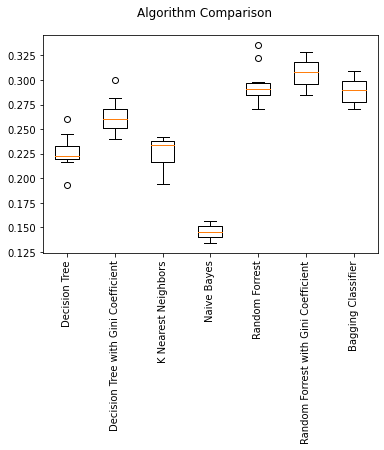

In [34]:
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10,random_state=123)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, np.mean(cv_results), cv_results.var())
    print(msg)

fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
plt.xticks(rotation=90)
ax.set_xticklabels(names)
plt.show()

In [37]:
from sklearn.externals import joblib

joblib.dump(rf,'doctors_fee_consultation.pkl')

ImportError: cannot import name 'joblib' from 'sklearn.externals' (C:\ggg\lib\site-packages\sklearn\externals\__init__.py)